In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
#loading the data
X = load_boston().data
Y = load_boston().target

In [3]:
#performing standardization
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X.shape[0]

506

# Implementing own SGD

In [119]:
#defining a function which computes the error at each iteration and also returns the error at last iteration
error_stepwise=[]
final_error=0
def cost(w,b):
    terror=0
    
    for i in range(506):
        terror+=(Y[i]-(np.dot(X[i],w)+b))**2
    terror=terror/506
    final_error=terror
    error_stepwise.append(terror)
    return final_error
#    terror


In [101]:
#Compute the gradient descent
#coefficient of shape of features
from tqdm import tqdm
w=np.zeros((X.shape[1],1))
wg=np.zeros((X.shape[1],1))
b=0
bg=0
#1000 iterations
for z in tqdm(range(5000)):
    wg=np.zeros((X.shape[1],1))
    bg=0
    #for each value of x
    for i in range(X.shape[0]):
        error=Y[i]-(np.dot(X[i],w)+b)
        z= (X[i]*error)
        z=np.reshape(z,(13,1))
        wg+=-2*z
        bg+=-2*(error)
    wg=wg/506
    bg=bg/506
    
    w=w-(0.1*wg)
    b=b-(0.1*bg)
    #to compute the error at each iteration
    cost(w,b)
    

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:46<00:00, 107.52it/s]


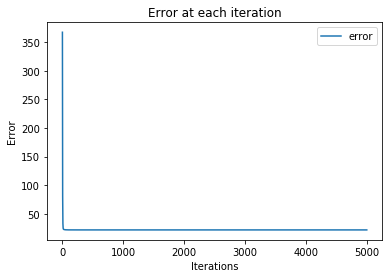

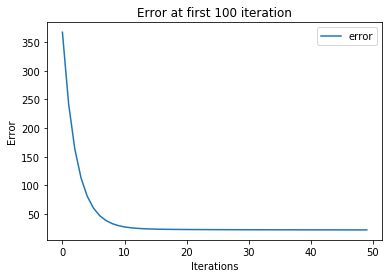

In [102]:
#plotting the error at each iteration
plt.figure(1)


plt.plot(error_stepwise,label="error")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error at each iteration")

#taking only few iterations as error reaches minimum soon
plt.figure(2)
plt.plot(error_stepwise[0:50],label="error")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error at first 100 iteration")
plt.show()


The loss function converged to minimum very soon

# Comparing Sklearn SGD vs own Implemented SGD

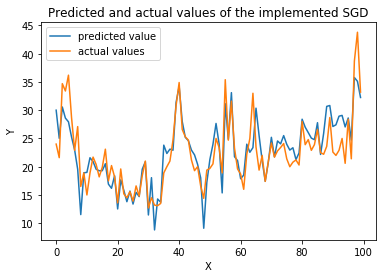

In [107]:
#predicted values vs actual values of implemented sgd
y_pred=[]
#plotting only the first 100 values to make graph clear

for i in range(X.shape[0]):
    y_pred.append(np.dot(X[i],w)+b)

plt.plot(y_pred[0:100],label="predicted value")
plt.plot(Y[0:100],label="actual values")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Predicted and actual values of the implemented SGD")
plt.show()


Observation:
<br>
predicted values and actual values are very similar

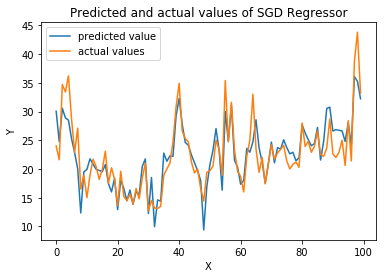

In [130]:
#predicted values vs actual values of sklearn sgd
clf = SGDRegressor(fit_intercept=True)
clf.fit(X, Y)

y_pred=clf.predict(X)
plt.plot(y_pred[0:100],label="predicted value")
plt.plot(Y[0:100],label="actual values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Predicted and actual values of SGD Regressor")
plt.show()


Observation:
<br>
predicted values and actual values are very similar

In [131]:
#Comparing sklearn vs own SGD weights
sklearn_weights=pd.DataFrame(clf.coef_)
imp_weights=pd.DataFrame(w)

weights=pd.concat([sklearn_weights, imp_weights], axis=1)
weights.columns=['sklearn_weights', 'imp_weights']
print("SKlearn regressor weights vs implemented SGD weights")
weights

SKlearn regressor weights vs implemented SGD weights


,sklearn_weights,imp_weights
0,-0.704309,-0.928146
1,0.507018,1.081569
2,-0.301946,0.140900
3,0.788805,0.681740
4,-1.044052,-2.056718
5,3.172094,2.674230
6,-0.021943,0.019466
7,-2.095738,-3.104044
8,1.083747,2.662218
9,-0.551249,-2.076782


In [126]:
# Comparing the MSE of sklearn vs own SGD
print("The MSE of Sklearns SGD regressor is: ",mean_squared_error(Y, clf.predict(X)))
mse=cost(w,b)
print("The MSE of our implemented SGD is:", mse)

The MSE of Sklearns SGD regressor is:  22.90817192455964
The MSE of our implemented SGD is: [21.89483118]


## Conclusion

we get slightly less error using our own implemented SGD.
<br>
The loss function converged to the minimum very soon.